# Car Price Prediction 

Problem Description: A Chinese automobile company aspires to enter the US market by setting up its manufacturing unit there and producing cars locally to give competition to its US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
The consulting firm has gathered a large dataset of different types of cars across the American market based on various market surveys.

Business Goal: You are required to model the price of cars with the available independent variables. The management will use it to understand how prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Apply any 5 algorithms to the regression problem provided. For example:

Linear Regression
Decision Tree Regressor
Random Forest Regressor
Gradient Boosting Regressor
Support Vector Regressor

## Data Exploration and Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


The dataframe has prices of various cars along with its specifications. It has 205 rows and 26 columns

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


The describe functions is used to perform a statistical analysis and lists attributes like mean, max value,min value etc.

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There is no null values in the dataframe.

In [8]:
df.duplicated().sum()

0

There is no duplicate rows in the dataframe.

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
len(df.columns)

26

In [11]:
print(df.nunique())

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


In [12]:
df.drop(['car_ID'],axis=1,inplace=True)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Dropping car_ID column as it no significant input to give in the model.

In [13]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [14]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [15]:
df['CarBrand']=df['CarName'].str.split(expand=True)[0]
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


Creating a CarBrand column by splitting the car name into two as Manufacturer and Model

In [16]:
df.drop(['CarName'],axis=1,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [17]:
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
df.replace(['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen','vw'],['alfa-romeo','mazda','nissan','porsche','toyota','volkswagen','volkswagen'],inplace=True)

In [19]:
df['CarBrand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Checking the spelling errors in the CarBrand columns values and replaced it with correct spelling.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

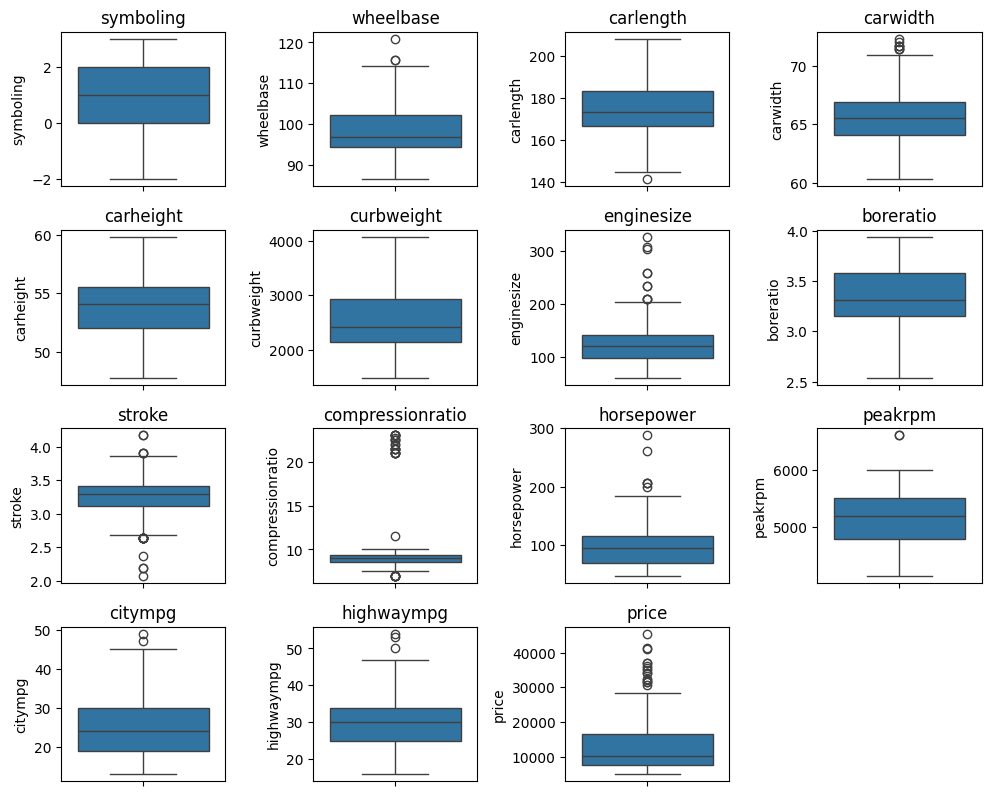

In [20]:
plt.figure(figsize=(10, 10))
num_cols = df.select_dtypes(include = ["int64","float64"]) 

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1) 
    sns.boxplot(df[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

A box plot is plotted in order to identify the numerical columns with outliers. Here price columns has significant number of outliers.

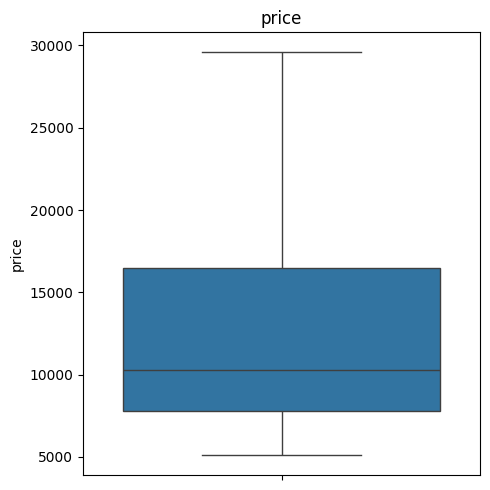

In [23]:
plt.figure(figsize=(5, 5))
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
UW = Q3 + 1.5 * IQR
LW = Q1 - 1.5 * IQR
df.loc[df['price'] < LW, col] = LW
df.loc[df['price'] > UW, col] = UW

sns.boxplot(df['price']) 
plt.title('price') 
    
plt.tight_layout()

plt.show()

Capping the outliers using IQR method

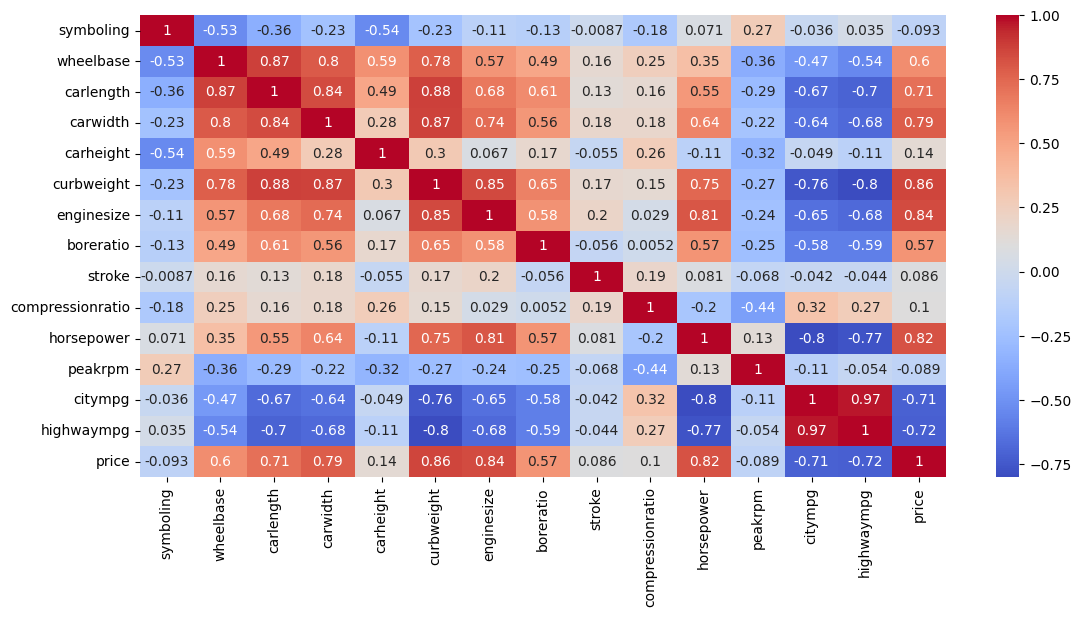

In [24]:
plt.figure(figsize=(13, 6))
plot_df = df.drop(['CarBrand', 'fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','enginetype','cylindernumber'], axis='columns')
corr = plot_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [25]:
corrabs=corr.abs()
upper = corrabs.where(np.triu(np.ones(corrabs.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['carlength', 'curbweight', 'enginesize', 'highwaympg', 'price']

Using the heatmap(Visual representation of correlation matrix) inorder to find multicollinearity (absolute value greater than 0.85) so we that we can remove that columns.

In [26]:
to_drop.remove('price')
dfs = df.drop(columns=to_drop)
dfs

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,...,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,...,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romeo
1,3,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,...,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romeo
2,1,gas,std,two,hatchback,rwd,front,94.5,65.5,52.4,...,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romeo
3,2,gas,std,four,sedan,fwd,front,99.8,66.2,54.3,...,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,66.4,54.3,...,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,68.9,55.5,...,four,mpfi,3.78,3.15,9.5,114,5400,23,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,68.8,55.5,...,four,mpfi,3.78,3.15,8.7,160,5300,19,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,68.9,55.5,...,six,mpfi,3.58,2.87,8.8,134,5500,18,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,68.9,55.5,...,six,idi,3.01,3.40,23.0,106,4800,26,22470.0,volvo


Dropping the columns with multicollinearity.

## Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
cat_col=dfs.select_dtypes(include='object').columns

for i in cat_col:
    dfs[i]=LabelEncoder().fit_transform(dfs[i])
dfs

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,...,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarBrand
0,3,1,0,1,0,2,0,88.6,64.1,48.8,...,2,5,3.47,2.68,9.0,111,5000,21,13495.0,0
1,3,1,0,1,0,2,0,88.6,64.1,48.8,...,2,5,3.47,2.68,9.0,111,5000,21,16500.0,0
2,1,1,0,1,2,2,0,94.5,65.5,52.4,...,3,5,2.68,3.47,9.0,154,5000,19,16500.0,0
3,2,1,0,0,3,1,0,99.8,66.2,54.3,...,2,5,3.19,3.40,10.0,102,5500,24,13950.0,1
4,2,1,0,0,3,0,0,99.4,66.4,54.3,...,1,5,3.19,3.40,8.0,115,5500,18,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,68.9,55.5,...,2,5,3.78,3.15,9.5,114,5400,23,16845.0,21
201,-1,1,1,0,3,2,0,109.1,68.8,55.5,...,2,5,3.78,3.15,8.7,160,5300,19,19045.0,21
202,-1,1,0,0,3,2,0,109.1,68.9,55.5,...,3,5,3.58,2.87,8.8,134,5500,18,21485.0,21
203,-1,0,1,0,3,2,0,109.1,68.9,55.5,...,3,3,3.01,3.40,23.0,106,4800,26,22470.0,21


Label encoding all the categorical columns.

## Feature Scaling

In [29]:
X=dfs.drop(columns='price')
Y=dfs[["price"]]
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,CarBrand
0,3,1,0,1,0,2,0,88.6,64.1,48.8,0,2,5,3.47,2.68,9.0,111,5000,21,0
1,3,1,0,1,0,2,0,88.6,64.1,48.8,0,2,5,3.47,2.68,9.0,111,5000,21,0
2,1,1,0,1,2,2,0,94.5,65.5,52.4,5,3,5,2.68,3.47,9.0,154,5000,19,0
3,2,1,0,0,3,1,0,99.8,66.2,54.3,3,2,5,3.19,3.40,10.0,102,5500,24,1
4,2,1,0,0,3,0,0,99.4,66.4,54.3,3,1,5,3.19,3.40,8.0,115,5500,18,1


In [30]:
Y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [55]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_x = standard_scaler.fit_transform(X) 
scaled_x


array([[ 1.74347043,  0.32879797, -0.46929532, ..., -0.26296022,
        -0.64655303, -1.94533239],
       [ 1.74347043,  0.32879797, -0.46929532, ..., -0.26296022,
        -0.64655303, -1.94533239],
       [ 0.133509  ,  0.32879797, -0.46929532, ..., -0.26296022,
        -0.95301169, -1.94533239],
       ...,
       [-1.47645244,  0.32879797, -0.46929532, ...,  0.78785546,
        -1.10624102,  1.40319058],
       [-1.47645244, -3.04138127,  2.13085442, ..., -0.68328649,
         0.11959362,  1.40319058],
       [-1.47645244,  0.32879797,  2.13085442, ...,  0.57769233,
        -0.95301169,  1.40319058]])

Using Standard Scaler to scale the independent variables.

In [31]:
scaled_x.shape

(205, 20)

## Data Splitting

In [92]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,Y,test_size=0.4,random_state=55)

Splitting the data into train and test set.

In [93]:
x_train.shape

(123, 20)

## Model Implementaion and Evaluation

### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [95]:
lr.fit(x_train,y_train)

LinearRegression()

In [96]:
predicted_test=lr.predict(x_test)

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import math
print("MSE= ",(mean_squared_error(predicted_test,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predicted_test,y_test)))
print("R2 score = ",r2_score(predicted_test,y_test))
print("MAE= ",(mean_absolute_error(y_test,predicted_test)))
print("Accuracy = ",lr.score(x_test,y_test))

MSE=  5059929.24823581
RMSE=  2249.428649287594
R2 score =  0.8721902270036307
MAE=  1608.344789541095
Accuracy =  0.889986776267843


### Random Forest Regression

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=42)

In [80]:
rf.fit(x_train,y_train)

D:\Python\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [82]:
predicted_testrf=rf.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import math
print("MSE= ",(mean_squared_error(predicted_testrf,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predicted_testrf,y_test)))
print("R2 score = ",r2_score(predicted_testrf,y_test))
print("MAE= ",(mean_absolute_error(y_test,predicted_testrf)))
print("Accuracy = ",rf.score(x_test,y_test))

MSE=  5001804.836289024
RMSE=  2236.4715147501934
R2 score =  0.8604737832236765
MAE=  1577.8562822383242
Accuracy =  0.8912505200124874


### Support Vector Regression

In [156]:
from sklearn.model_selection import train_test_split
sx_train,sx_test,sy_train,sy_test=train_test_split(scaled_x,Y,test_size=0.2,random_state=202)

In [157]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [158]:
svr.fit(sx_train,sy_train)

D:\Python\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [159]:
predicted_testsvr=svr.predict(sx_test)

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import math
print("MSE= ",(mean_squared_error(predicted_testsvr,sy_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predicted_testsvr,sy_test)))
print("R2 score = ",r2_score(predicted_testsvr,sy_test))
print("MAE= ",(mean_absolute_error(sy_test,predicted_testsvr)))
print("Accuracy = ",svr.score(sx_test,sy_test))

MSE=  20933912.77690762
RMSE=  4575.359305771255
R2 score =  -75.92791770859388
MAE=  3504.4376778344017
Accuracy =  0.1347169546700313


### Decision Tree Regression

In [195]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_leaf=6,random_state=190)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, random_state=190)

In [196]:
predicted_testdt=dt.predict(x_test)

In [197]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import math
print("MSE= ",(mean_squared_error(predicted_testdt,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predicted_testdt,y_test)))
print("R2 score = ",r2_score(predicted_testdt,y_test))
print("MAE= ",(mean_absolute_error(y_test,predicted_testdt)))
print("Accuracy = ",dt.score(x_test,y_test))

MSE=  6921648.81116836
RMSE=  2630.902660907157
R2 score =  0.8140522071164162
MAE=  1812.0401316122898
Accuracy =  0.8495091804842967


### Gradient Boosting Regression

In [198]:
from sklearn.ensemble import GradientBoostingRegressor

gb=GradientBoostingRegressor(random_state=301)
gb.fit(x_train,y_train)

D:\Python\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(random_state=301)

In [199]:
predicted_testgb=gb.predict(x_test)

In [200]:
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
import math
print("MSE= ",(mean_squared_error(predicted_testgb,y_test)))
print("RMSE= ",math.sqrt(mean_squared_error(predicted_testgb,y_test)))
print("R2 score = ",r2_score(predicted_testgb,y_test))
print("MAE= ",(mean_absolute_error(y_test,predicted_testgb)))
print("Accuracy = ",gb.score(x_test,y_test))

MSE=  5472228.842172219
RMSE=  2339.279556224997
R2 score =  0.860807070522251
MAE=  1501.223651671262
Accuracy =  0.8810225387761392


From the above results Random Forest Regression shows more accuracy with 89.12 percentage